In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading Data.
* **NB:**  Currently has Non faulty data.  Fault in Bearing
* **DE:** Drive end accelerometer data
* **IR:**  Currently has  faulty data.
* **FE:** fan end accelerometer data. Fault in fan

### problem statement
Preventive maintenance comes in to reduce unplanned failures while businesses try to address problem in advance. However, the costs could still be high. By using predictive maintenance, we can prevent those unexpected problems more efficiently. We can fix the machines just in time as we monitor and predict the status of them.


In [2]:
nb = pd.read_csv('/content/NB.csv')
nb['FaultIndicator'] = 0
nb.head()

,DE,FE,FaultIndicator
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0


In [35]:
nb.describe()

,DE,FE,FaultIndicator
count,121155.000000,121155.000000,121155.0
mean,0.011768,0.032724,0.0
std,0.063400,0.065195,0.0
min,-0.275998,-0.213056,0.0
25%,-0.030249,-0.013355,0.0
50%,0.014186,0.031024,0.0
75%,0.056118,0.077045,0.0
max,0.359236,0.303867,0.0


In [3]:
ir = pd.read_csv('/content/IR - 7.csv')
ir['FaultIndicator'] = 1
ir.head()

,DE,FE,FaultIndicator
0,-0.093238,-0.029175,1
1,0.187288,-0.186347,1
2,0.217663,-0.341260,1
3,0.070172,-0.160871,1
4,0.100385,0.179978,1


In [36]:
ir.describe()

,DE,FE,FaultIndicator
count,121155.000000,121155.000000,121155.0
mean,0.004557,0.033972,1.0
std,0.299474,0.232675,0.0
min,-1.425531,-0.895782,1.0
25%,-0.148872,-0.120602,1.0
50%,0.001299,0.032051,1.0
75%,0.153176,0.187683,1.0
max,1.639620,0.957213,1.0


In [4]:
data = nb.append(ir).reset_index(drop=True)
data.head()

<ipython-input-4-5b64118c3f06>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = nb.append(ir).reset_index(drop=True)


,DE,FE,FaultIndicator
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0


In [5]:
data.shape

(242310, 3)

In [6]:
### visualizations

<Axes: >

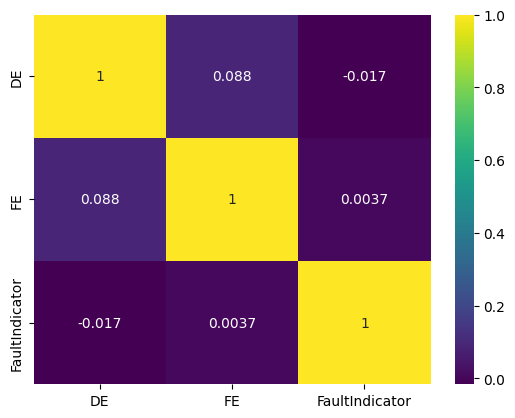

In [7]:
sns.heatmap(data.corr(), cmap= 'viridis', annot=True)

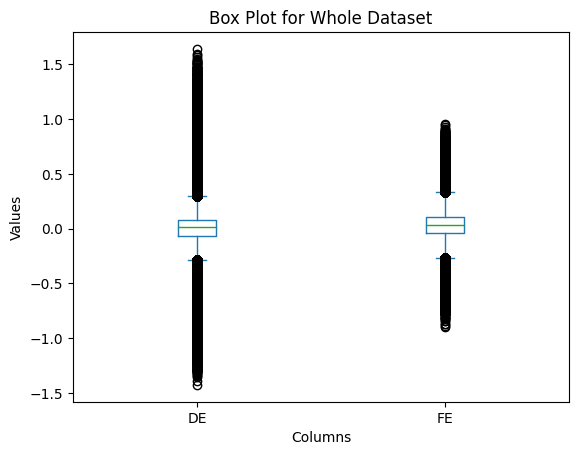

In [8]:
data[['DE','FE']].plot(kind='box', title = 'Box Plot for Whole Dataset', \
         xlabel = 'Columns', ylabel = 'Values');

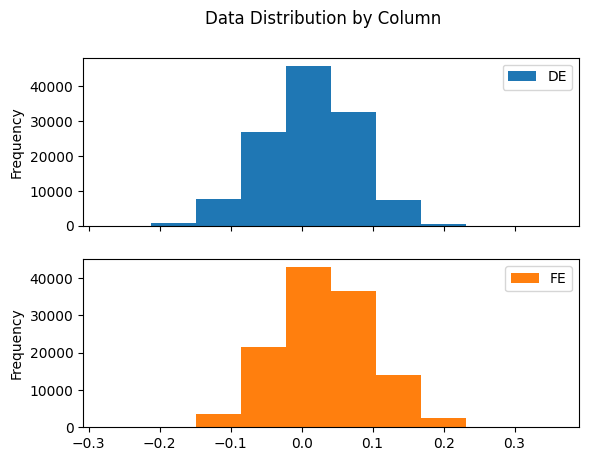

In [9]:
nb[['DE','FE']].plot(kind='hist',subplots = True, title = 'Data Distribution by Column');

In [10]:
### Data Preparation

In [11]:
### check for missing data

data.isnull().sum()

DE                0
FE                0
FaultIndicator    0
dtype: int64

In [12]:
### removing duplicates

In [13]:
data = data[~data.duplicated()]

In [14]:
### Into the rome of ML

In [15]:
X = data.drop('FaultIndicator', axis=1)
y = data['FaultIndicator']

In [16]:
X.shape, y.shape

((235369, 2), (235369,))

In [17]:
### Scaling(Note: Scaling is not really necessary for the tree based model)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164758, 2), (70611, 2), (164758,), (70611,))

In [22]:
### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, \
f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [24]:
def model_evaluation(model,X_train=X_train,\
                     y_train=y_train,\
                     X_test=X_test,\
                     y_test=y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Confusion Matrix for model: {model}')
    cm = confusion_matrix(y_test, pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(f'Model: {model} \n Accuracy: {accuracy:.2f} \n F1: {f1:.2f} \n Precision: {precision:.2f}\n Recall: {recall:.2f}')

In [33]:
lr = LogisticRegression()

Confusion Matrix for model: LogisticRegression()


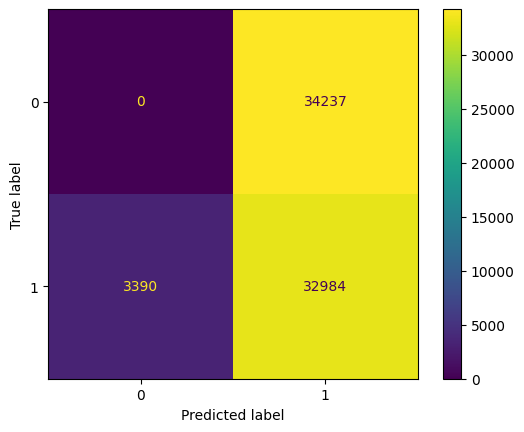

Model: LogisticRegression() 
 Accuracy: 0.47 
 F1: 0.64 
 Precision: 0.49
 Recall: 0.91


In [34]:
model_evaluation(lr)

In [25]:
#from sklearn.svm import SVC
#svc = SVC()
#model_evaluation(svc)

Confusion Matrix for model: RandomForestClassifier()


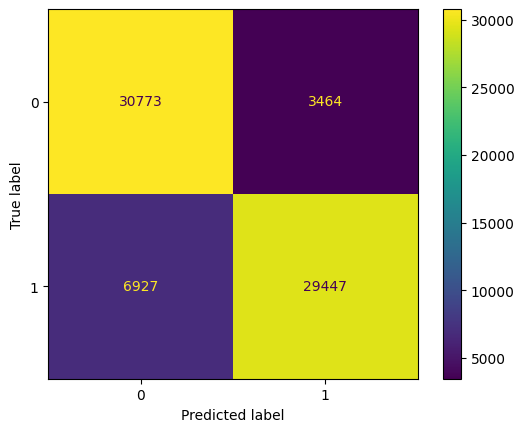

Model: RandomForestClassifier() 
 Accuracy: 0.85 
 F1: 0.85 
 Precision: 0.89
 Recall: 0.81


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_evaluation(rf)

Confusion Matrix for model: KNeighborsClassifier()


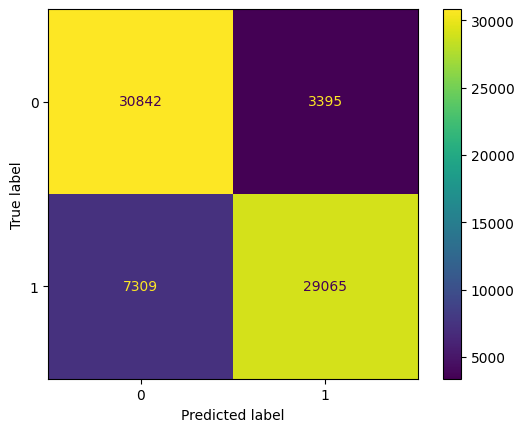

Model: KNeighborsClassifier() 
 Accuracy: 0.85 
 F1: 0.84 
 Precision: 0.90
 Recall: 0.80


In [27]:
#use KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_evaluation(knn)

In [28]:
### exporting the model
import pickle
rf_exported = pickle.dump(rf, open("bearing_random_forest.pkl", "wb"))


In [29]:
with open("bearing_random_forest.pkl", "rb") as file:
    rfmodel = pickle.load(file)

In [30]:
test_df = pd.DataFrame(columns=['DE', 'FE'], data = zip([0.0473,-0.8272,0.2827],[0.0829,0.0072,0.0026]))

In [31]:
test_df

,DE,FE
0,0.0473,0.0829
1,-0.8272,0.0072
2,0.2827,0.0026


In [32]:
rfmodel.predict(test_df)

array([1, 1, 1])

**Conclusion**
#### out of all randomforest has the highest F1 score. F1 score is the average of the precsion and recall